In [1]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving salary_batting_people_2015.csv to salary_batting_people_2015.csv


In [3]:
import pandas as pd
df = pd.read_csv('salary_batting_people_2015.csv')
df.head()

,uniqueid,yearid,teamid,lgid,playerid,salary,games,bats,runs,hits,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015ARIahmedni01,2015,ARI,NL,ahmedni01,508500,134.0,421.0,49.0,95.0,...,Ahmed,Nicholas Mark,201,74,R,R,2014-06-29,2021-09-17,ahmen001,ahmedni01
1,2015ARIanderch01,2015,ARI,NL,anderch01,512500,28.0,48.0,0.0,5.0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01
2,2015ARIchafian01,2015,ARI,NL,chafian01,507500,66.0,3.0,0.0,0.0,...,Chafin,Andrew Gregory,235,74,R,L,2014-08-13,2021-09-29,chafa001,chafian01
3,2015ARIcollmjo01,2015,ARI,NL,collmjo01,1400000,44.0,27.0,2.0,5.0,...,Collmenter,Joshua Michael,240,75,R,R,2011-04-17,2017-05-24,collj001,collmjo01
4,2015ARIcorbipa01,2015,ARI,NL,corbipa01,524000,16.0,25.0,1.0,3.0,...,Corbin,Patrick Alan,220,76,L,L,2012-04-30,2021-09-28,corbp001,corbipa01


In [4]:
df.columns

Index(['uniqueid', 'yearid', 'teamid', 'lgid', 'playerid', 'salary', 'games',
       'bats', 'runs', 'hits', 'doubles', 'triples', 'homeruns', 'rbi',
       'stolen_bases', 'caught_stealing', 'walks', 'strike_outs',
       'international_walks', 'hit_by_pitch', 'sacrifice_bunt',
       'sacrifice_flies', 'hit_into_double_plays', 'birthyear', 'birthmonth',
       'birthday', 'birthcountry', 'birthstate', 'birthcity', 'deathyear',
       'deathmonth', 'deathday', 'deathcountry', 'deathstate', 'deathcity',
       'namefirst', 'namelast', 'namegiven', 'weight', 'height', 'bats_hand',
       'throws_hand', 'debut', 'finalgame', 'retroid', 'bbrefid'],
      dtype='object')

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

uniqueid                   0
yearid                     0
teamid                     0
lgid                       0
playerid                   0
salary                     0
games                      3
bats                       3
runs                       3
hits                       3
doubles                    3
triples                    3
homeruns                   3
rbi                        3
stolen_bases               3
caught_stealing            3
walks                      3
strike_outs                3
international_walks        3
hit_by_pitch               3
sacrifice_bunt             3
sacrifice_flies            3
hit_into_double_plays      3
birthyear                  0
birthmonth                 0
birthday                   0
birthcountry               0
birthstate                22
birthcity                  0
deathyear                814
deathmonth               814
deathday                 814
deathcountry             814
deathstate               814
deathcity     

In [7]:
df = df[['salary','games','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'strike_outs', 'weight','height']]
df.columns

Index(['salary', 'games', 'bats', 'runs', 'rbi', 'hits', 'doubles', 'triples',
       'homeruns', 'walks', 'strike_outs', 'weight', 'height'],
      dtype='object')

In [8]:
df.isnull().sum()

salary         0
games          3
bats           3
runs           3
rbi            3
hits           3
doubles        3
triples        3
homeruns       3
walks          3
strike_outs    3
weight         0
height         0
dtype: int64

In [12]:
cleaned_df = df.dropna()

In [13]:
y = cleaned_df['salary']
X = cleaned_df[['games','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'strike_outs', 'weight','height']]

In [14]:
print(y.shape)
print(X.shape)

(814,)
(814, 12)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
#Create Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all our features in X
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Check R-Squared
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.1647563425979931
Testing Score: 0.18722990697394126


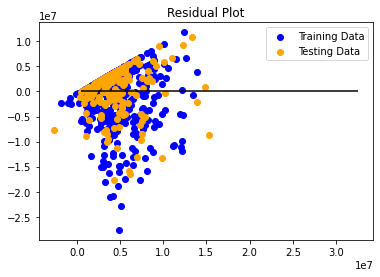

In [22]:
#Residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [23]:
from google.colab import files

cleaned_df.to_csv('2015_Cleaned.csv', encoding = 'utf-8-sig') 
files.download('2015_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>